In [3]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import kagglehub
crawford_emnist_path = kagglehub.dataset_download('crawford/emnist')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,ZeroPadding2D,Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
img_width=28
img_height=28

In [5]:
datagen=ImageDataGenerator(1/255.0,validation_split=0.2)

In [6]:
data = pd.read_csv(crawford_emnist_path + "/emnist-digits-train.csv")

In [7]:
x_train = data.drop(columns="8")
y_train = data["8"]

In [9]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1, 28, 28,1)
x_train = x_train / 255.0
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (239999, 28, 28, 1)
239999 train samples


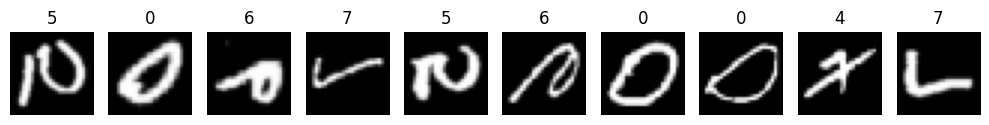

In [10]:
plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)


model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train_cat,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8899 - loss: 0.3628 - val_accuracy: 0.9774 - val_loss: 0.0781
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9722 - loss: 0.0964 - val_accuracy: 0.9837 - val_loss: 0.0559
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9780 - loss: 0.0754 - val_accuracy: 0.9842 - val_loss: 0.0523
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9807 - loss: 0.0650 - val_accuracy: 0.9857 - val_loss: 0.0478
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9829 - loss: 0.0580 - val_accuracy: 0.9866 - val_loss: 0.0442
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9848 - loss: 0.0526 - val_accuracy: 0.9868 - val_loss: 0.0445
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9879 - val_loss: 0.0416
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9858 - loss:

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)


model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train_cat,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 160s 105ms/step - accuracy: 0.9045 - loss: 0.3077 - val_accuracy: 0.9898 - val_loss: 0.0337
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 151s 101ms/step - accuracy: 0.9859 - loss: 0.0491 - val_accuracy: 0.9925 - val_loss: 0.0253
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 210s 106ms/step - accuracy: 0.9905 - loss: 0.0343 - val_accuracy: 0.9935 - val_loss: 0.0233
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 191s 98ms/step - accuracy: 0.9917 - loss: 0.0289 - val_accuracy: 0.9943 - val_loss: 0.0203
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 202s 98ms/step - accuracy: 0.9927 - loss: 0.0259 - val_accuracy: 0.9944 - val_loss: 0.0210
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 157s 104ms/step - accuracy: 0.9934 - loss: 0.0228 - val_accuracy: 0.9954 - val_loss: 0.0190
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 167s 111ms/step - accuracy: 0.9944 - loss: 0.0192 - val_accuracy: 0.9950 - val_loss: 0.0203
Epoch 8/10
1500/1500 ━━━━

In [15]:
import gradio as gr
from PIL import Image,ImageOps
def predict_digit(data):
    try:
        image = data["composite"]

        image = Image.fromarray(image).convert("L")
        image = ImageOps.mirror(image)
        image = image.rotate(90)
        image = np.invert(image)
        img = np.array(image)


        coords = np.argwhere(img > 20)
        if coords.size == 0:
            return "No digit detected."
        y0, x0 = coords.min(axis=0)
        y1, x1 = coords.max(axis=0) + 1


        cropped = img[y0:y1, x0:x1]

        resized = Image.fromarray(cropped).resize((20, 20), Image.LANCZOS)
        new_img = Image.new("L", (28, 28))
        new_img.paste(resized, ((28 - 20) // 2, (28 - 20) // 2))
        image = np.array(new_img) / 255.0
        image = image.reshape(1, 28, 28, 1)

        prediction = model.predict(image)

        return f"Predicted Digit: {np.argmax(prediction)}\nConfidence: {np.max(prediction)*100:0.1f}"
    except Exception as e:
      return f"Error: {e}"
demo = gr.Interface(
    fn=predict_digit,
    inputs=gr.Sketchpad(image_mode="L",height=400,width=400),
    outputs="text",
    title="Digit Classifier",
    description="Draw a digit (0–9) and let the model predict it!",
    allow_flagging="never"
)
demo.launch(share=True)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://27e732ad1d1496f14b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
